# Analysis of College Basketball Teams
### Noah Zbozny

# Table of Contents
1. Introduction
2. Getting Started
   - 2.1 Required Libraries
   - 2.2 Data Collection
   - 2.3 Taking a Look at the Data
   - 2.4 Isolate the Top 5 Teams
   - 2.5 More Data Exploration
3. Predicting Postseason Rankings
   - 3.1 Preparing the Data
   - 3.2 Creating and Optimizing the Predictors
4. Conclusion

# 1. Introduction

The purpose of this project is to create a tutorial for someone learning how to go through the data science pipeline. This project will utilize data on NCAA Division I college basketball teams to try to predict a team's performance in the NCAA March Madness tournament. We will start off by analyzing team's statistics during the season, see which features appear to be the best at predicting a team's success in the postseason, and then we'll see if we're able to successfully predict a team's postseason ranking based on their performance during the season. 

# 2. Getting Started

## 2.1 Required Libaries
* Pandas
* Numpy
* Matplotlib
* Seaborn
* SKLearn Train Test Split
* SKLearn Random Forest Classifier
* SKLearn K-Neighbors Classifier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## 2.2 Data Collection
The data that we will be using for this project comes from a Kaggle dataset on Division I college basketball teams. The dataset has detailed information on all Division I college basketball teams over the last 5 seasons, including 22 different statistics regarding their season and their postseason. The list of statistics and their descriptions is on the Kaggle website.  
The link to the dataset can be found below:  
https://www.kaggle.com/andrewsundberg/college-basketball-dataset

## 2.3 Taking a Look at the Data

Now that we have our data, the next step will be to look at it and see what we have in our dataset, and see if anything needs to be changed, added, or removed in order to move on with our analysis.

In [2]:
#Read and display the data from the CSV file from our dataset
data = pd.read_csv('college-basketball-dataset/cbb.csv')
data.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017


The descriptions for all 24 of the columns shown above can be found on the Kaggle website, but a few of note are:  
**TEAM**: The Division I college basketball school  
**CONF**: The Athletic Conference in which the school participates in  
**G**: Number of games played  
**W**: Number of games won  
**ADJOE**: Adjusted Offensive Efficiency (An estimate of the offensive efficiency (points scored per 100 possessions) a team would have against the average Division I defense)  
**ADJDE**: Adjusted Defensive Efficiency (An estimate of the defensive efficiency (points allowed per 100 possessions) a team would have against the average Division I offense)  
**BARTHAG**: Power Rating (Chance of beating an average Division I team)  
**2P_O**: Two-Point Shooting Percentage  
**3P_O**: Three-Point Shooting Percentage  
**POSTSEASON**: Round where the given team was eliminated or where their season ended  
**SEED**: Seed in the NCAA March Madness Tournament  
**YEAR**: Season  

What's also interesting to note is that while there is a games column and a wins column, there is no percentage of games one column, which may be interesting to see, so let's create that column next.

In [3]:
#Create the win percentage column by dividing total wins by total games played
data['W_PCT'] = data['W'] / data['G']
data.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,W_PCT
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016,0.825000
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015,0.900000
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018,0.825000
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019,0.815789
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017,0.948718


As you can see, our dataframe now contains a column called W_PCT, which contains the percentage of wins a given team had over that season.

The next thing we'll do is take a look at some basic statistics for each column, just to get an idea of what we're looking at.

In [4]:
data.describe()

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,YEAR,W_PCT
count,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,...,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,340.000000,1757.000000,1757.000000
mean,31.523051,16.513375,103.542402,103.542459,0.493398,50.120489,50.312806,18.591804,18.521286,29.277120,...,35.373307,49.135970,49.298065,34.563517,34.744792,68.422254,-7.837109,8.791176,2017.002277,0.515542
std,2.602819,6.545571,7.304975,6.472676,0.255291,3.130430,2.859604,1.991637,2.108968,4.101782,...,5.900935,3.422136,3.288265,2.742323,2.369727,3.258920,6.988694,4.674090,1.415419,0.178418
min,24.000000,0.000000,76.700000,84.000000,0.007700,39.400000,39.600000,12.400000,10.200000,15.000000,...,21.800000,37.700000,37.700000,25.200000,27.100000,57.200000,-25.200000,1.000000,2015.000000,0.000000
25%,30.000000,12.000000,98.600000,98.900000,0.283700,48.100000,48.400000,17.200000,17.100000,26.600000,...,31.200000,46.900000,47.100000,32.600000,33.100000,66.400000,-13.000000,5.000000,2016.000000,0.387097
50%,31.000000,16.000000,103.100000,103.800000,0.474000,50.000000,50.300000,18.500000,18.500000,29.400000,...,34.900000,49.000000,49.300000,34.600000,34.700000,68.500000,-8.400000,9.000000,2017.000000,0.518519
75%,33.000000,21.000000,108.100000,108.000000,0.710600,52.100000,52.300000,19.800000,19.900000,31.900000,...,39.200000,51.400000,51.500000,36.400000,36.300000,70.400000,-3.100000,13.000000,2018.000000,0.645161
max,40.000000,38.000000,129.100000,124.000000,0.984200,59.800000,59.500000,26.100000,28.000000,42.100000,...,58.500000,62.600000,61.200000,44.100000,43.100000,83.400000,13.100000,16.000000,2019.000000,0.974359


Something nice about this data is that the count row of every numerical column (with the exception of SEED) is 1757, which is the number of data points in the dataset, meaning that the dataset isn't missing any data. The reason that SEED has a lower count is just because not every team gets seeded, so we would expect that not to be completely filled out.

## 2.4 Isolate the Top 5 Teams

The next thing we'll do is take a look at the top 5 teams for different metrics for each year. Let's look at the top 5 teams for win percentage, adjusted offensive efficiency, adjusted defensive efficiency, and power rating.

The first thing we have to do for this part is split the dataframe into 5 different groups, one for each season.

In [5]:
data_grouped = data.groupby('YEAR')

Now, let's find the top teams based on each metric for each year.

In [6]:
tops = {}
metrics = ['W_PCT', 'ADJOE', 'ADJDE', 'BARTHAG']

#This loop gets the top 5 values for each metric for each season
#This could be done in a nested loop, one for the metric and one for the year, but it's much easier to understand
#  what's going on inside the loop by having the year part of the loop unrolled 
for metric in metrics:
    tops[metric] = data_grouped.get_group(2015).sort_values(metric, ascending=False).head(5)
    tops[metric] = tops[metric].append(data_grouped.get_group(2016).sort_values(metric, ascending=False).head(5))
    tops[metric] = tops[metric].append(data_grouped.get_group(2017).sort_values(metric, ascending=False).head(5))
    tops[metric] = tops[metric].append(data_grouped.get_group(2018).sort_values(metric, ascending=False).head(5))
    tops[metric] = tops[metric].append(data_grouped.get_group(2019).sort_values(metric, ascending=False).head(5))

### Win Percentage

In [7]:
#print the top values for the Win Percentage for each season
tops['W_PCT'][['TEAM', 'CONF', 'W_PCT', 'POSTSEASON', 'YEAR']]

,TEAM,CONF,W_PCT,POSTSEASON,YEAR
37,Kentucky,SEC,0.974359,F4,2015
28,Gonzaga,WCC,0.918919,E8,2015
1495,Villanova,BE,0.916667,R32,2015
1,Wisconsin,B10,0.900000,2ND,2015
5,Duke,ACC,0.897436,Champions,2015
8,Villanova,BE,0.875000,Champions,2016
18,Kansas,B12,0.864865,E8,2016
1525,Arkansas Little Rock,SB,0.848485,R32,2016
185,SMU,Amer,0.833333,NaN,2016
1571,Michigan St.,B10,0.828571,R64,2016


### Offensive Efficiency

In [8]:
tops['ADJOE'][['TEAM', 'CONF', 'ADJOE', 'POSTSEASON', 'YEAR']]

,TEAM,CONF,ADJOE,POSTSEASON,YEAR
1,Wisconsin,B10,129.1,2ND,2015
11,Notre Dame,ACC,125.3,E8,2015
5,Duke,ACC,125.2,Champions,2015
1495,Villanova,BE,121.9,R32,2015
37,Kentucky,SEC,120.3,F4,2015
0,North Carolina,ACC,123.3,2ND,2016
1528,Kentucky,SEC,123.2,R32,2016
8,Villanova,BE,123.1,Champions,2016
1571,Michigan St.,B10,122.5,R64,2016
1737,Iowa St.,B12,121.4,S16,2016


### Defensive Efficiency

In [9]:
tops['ADJDE'][['TEAM', 'CONF', 'ADJDE', 'POSTSEASON', 'YEAR']]

,TEAM,CONF,ADJDE,POSTSEASON,YEAR
1154,The Citadel,SC,120.0,NaN,2015
1336,Alcorn St.,SWAC,118.2,NaN,2015
1338,Grambling St.,SWAC,117.0,NaN,2015
1237,Central Arkansas,Slnd,116.3,NaN,2015
1340,Mississippi Valley St.,SWAC,116.3,NaN,2015
1256,Northwestern St.,Slnd,118.2,NaN,2016
923,Central Connecticut,NEC,118.0,NaN,2016
1249,Central Arkansas,Slnd,117.8,NaN,2016
348,Southern Utah,BSky,117.8,NaN,2016
1162,The Citadel,SC,117.3,NaN,2016


### Power Rating

In [10]:
tops['BARTHAG'][['TEAM', 'CONF', 'BARTHAG', 'POSTSEASON', 'YEAR']]

,TEAM,CONF,BARTHAG,POSTSEASON,YEAR
37,Kentucky,SEC,0.9842,F4,2015
5,Duke,ACC,0.9764,Champions,2015
1,Wisconsin,B10,0.9758,2ND,2015
23,Arizona,P12,0.9700,E8,2015
1495,Villanova,BE,0.9663,R32,2015
8,Villanova,BE,0.9703,Champions,2016
18,Kansas,B12,0.9662,E8,2016
13,Virginia,ACC,0.9600,E8,2016
0,North Carolina,ACC,0.9531,2ND,2016
1528,Kentucky,SEC,0.9517,R32,2016


Looking at the above tables, it appears that Power Rating is the best predictor for where a team will make it in their postseason ranking. Behind Power Rating appears to be Offensive Efficiency and then Win Percentage. It appears that Defensive Efficiency is completely unsuccessful at predicting teams making it far in their postseason ranking, as none of the top 5 teams on Defensive Efficiency were ranked in their postseason. However...

In [11]:
#Like above, this could be done in a loop, but it's much easier to understand what's going on in this block
#  with the loop unrolled
def_asc_ranking = data_grouped.get_group(2015).sort_values('ADJDE', ascending=True).head(5)
def_asc_ranking = def_asc_ranking.append(data_grouped.get_group(2016).sort_values('ADJDE', ascending=True).head(5))
def_asc_ranking = def_asc_ranking.append(data_grouped.get_group(2017).sort_values('ADJDE', ascending=True).head(5))
def_asc_ranking = def_asc_ranking.append(data_grouped.get_group(2018).sort_values('ADJDE', ascending=True).head(5))
def_asc_ranking = def_asc_ranking.append(data_grouped.get_group(2019).sort_values('ADJDE', ascending=True).head(5))
def_asc_ranking[['TEAM', 'CONF', 'ADJDE', 'POSTSEASON', 'YEAR']]

,TEAM,CONF,ADJDE,POSTSEASON,YEAR
37,Kentucky,SEC,84.0,F4,2015
1462,Virginia,ACC,84.1,R32,2015
23,Arizona,P12,86.9,E8,2015
10,Louisville,ACC,87.4,E8,2015
1518,San Diego St.,MWC,87.5,R32,2015
1516,Wichita St.,MVC,87.8,R32,2016
109,Louisville,ACC,89.6,NaN,2016
880,San Diego St.,MWC,90.3,NaN,2016
18,Kansas,B12,90.4,E8,2016
1583,West Virginia,B12,90.4,R64,2016


It appears that with the team rankings for Defensive Efficiency, the worse ranked teams appear to do better in their postseason rankings.  

Because of this, we'll replace the rankings in the tops array with the ascending rankings to see if it does a better job of predicting.

In [12]:
tops['ADJDE'] = def_asc_ranking

Now, because the raw data above can be difficult for a person to look at and interpret, let's put it into line graphs to make it easier to read.

### Win Percentage

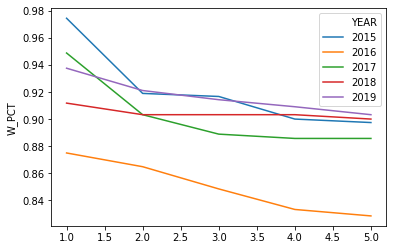

In [13]:
#Create the array of indices, which is just 1,2,3,4,5 repeating 5 times for the purpose of creating the graph.
#  The indices are the x-axis, while the metrics will be the y-axis
indices = [1,2,3,4,5] * 5
sns.lineplot(x=indices, y='W_PCT', hue='YEAR', data=tops['W_PCT'], palette=sns.color_palette(n_colors=5))
plt.show()

### Offensive Efficiency

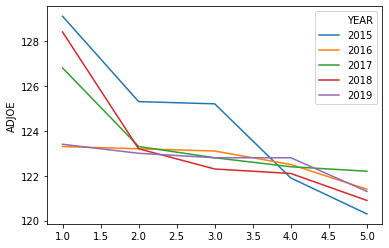

In [14]:
sns.lineplot(x=indices, y='ADJOE', hue='YEAR', data=tops['ADJOE'], palette=sns.color_palette(n_colors=5))
plt.show()

### Defensive Efficiency

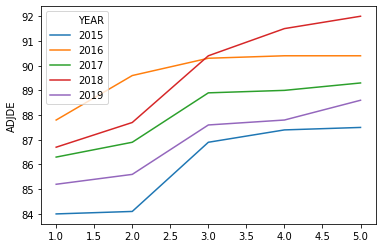

In [15]:
sns.lineplot(x=indices, y='ADJDE', hue='YEAR', data=tops['ADJDE'], palette=sns.color_palette(n_colors=5))
plt.show()

### Power Rating

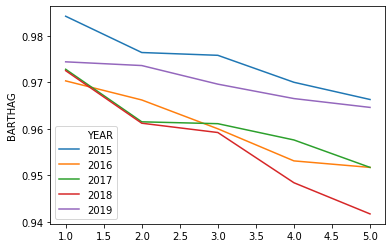

In [16]:
sns.lineplot(x=indices, y='BARTHAG', hue='YEAR', data=tops['BARTHAG'], palette=sns.color_palette(n_colors=5))
plt.show()

## 2.5 More Data Exploration

Another interesting thing to take a look at would be how many times a team occurs in these lists over the last 5 seasons, so let's do that now.

In [17]:
#Here we're getting the count of every team in the top 5 rankings by our metrics that we have above
top_team_counts = {}
for lst in tops.values():
    for team in lst['TEAM']:
        if team in top_team_counts:
            top_team_counts[team] += 1
        else:
            top_team_counts[team] = 1
#Convert those counts into a dataframe and sort them from greatest to least, then display the top 20
counts_pd = pd.DataFrame(list(top_team_counts.items()), columns=['TEAM', 'COUNT'])
counts_pd = counts_pd.sort_values('COUNT', ascending=False)
counts_pd.head(20)

,TEAM,COUNT
2,Villanova,12
12,Virginia,9
0,Kentucky,7
4,Duke,6
1,Gonzaga,6
3,Wisconsin,4
5,Kansas,4
22,Michigan,4
35,Texas Tech,3
26,West Virginia,3


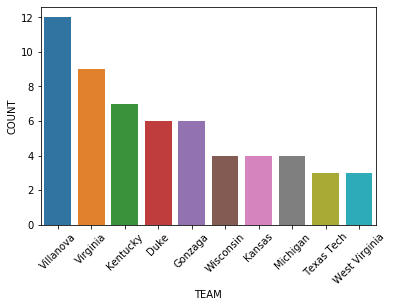

In [18]:
sns.barplot(data=counts_pd.head(10), x='TEAM', y='COUNT').set_xticklabels(counts_pd.head(10)['TEAM'], rotation=45)
plt.show()

It would appear that most of the teams that occur in our top 5 rankings don't recur too much. The only ones of note are Villanova, Kentucky, Duke, Virgina, and Gonzaga.  

We can also take a look at the distribution of our top 5 teams across the different Division I conferences.

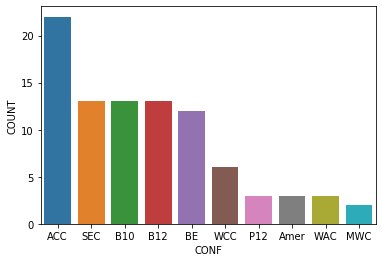

In [19]:
#Here we're doing the same thing as we did above except we're doing it for conferences instead of teams
top_conference_counts = {}
for lst in tops.values():
    for team in lst['CONF']:
        if team in top_conference_counts:
            top_conference_counts[team] += 1
        else:
            top_conference_counts[team] = 1
conf_count_df = pd.DataFrame(list(top_conference_counts.items()), columns=['CONF', 'COUNT'])
conf_count_df = conf_count_df.sort_values('COUNT', ascending=False)
sns.barplot(data=conf_count_df.head(10), x='CONF', y='COUNT')
plt.show()

As we can see, the ACC has the most top 5 ranked teams (by our various metrics) of any conference, followed by Big East and then Big 10. Now let's see how many of each postseason result our top 3 conferences (ACC, Big East, and Big 10) have.

In [20]:
#Now we're going to print out the count of values for our top 3 conferences
for conf in ['ACC', 'BE', 'B10']:
    print(conf)
    print(data[data['CONF'] == conf]['POSTSEASON'].value_counts())
    print('Ranked Teams Count: %d' % sum(data[data['CONF'] == conf]['POSTSEASON'].value_counts()))
    print('\n')

ACC
R64          9
S16          9
R32          7
E8           7
Champions    3
R68          1
F4           1
2ND          1
Name: POSTSEASON, dtype: int64
Ranked Teams Count: 38


BE
R32          11
R64          10
Champions     2
S16           2
R68           2
E8            1
Name: POSTSEASON, dtype: int64
Ranked Teams Count: 28


B10
R32    12
R64     8
S16     8
2ND     2
F4      2
E8      1
Name: POSTSEASON, dtype: int64
Ranked Teams Count: 33




Based on the data we just gathered, it looks like our rudimentary analysis does an okay job of predicting how well a conference will do in terms of total ranked teams, but let's try doing some more in-depth analysis to see if we can do a better job of predicting which conference, or which team, will win the NCAA March Madness Tournament.

# 3. Predicting Postseason Rankings

## 3.1 Preparing the Data

For most kinds of prediction and analysis, it's more effective if the data is numeric. Since our resultant data (the postseason column) is the only non-numeric data we have, our next step will be to convert it to numerical data.  

Since the only non-numerical data we need to convert is postseason rankings, this conversion will actually be fairly simple. The postseason rankings data consists of:  
**R68** = First Four  
**R64** = Round of 64  
**R32** = Round of 32  
**S16** = Sweet Sixteen  
**E8** = Elite Eight  
**F4** = Final Four  
**2ND** = Runner-up  
**Champions** = Winner of the NCAA March Madness Tournament  

So, since **R68** means that the team essentially tied for 68th, **S16** means the team tied for 16th, etc., we'll replace anywhere with **R68** with the number 68, **S16** with the number 16, **Champions** with 1, etc.  

Additionally, for the purposes of this project, since we're trying to rank the teams in their postseason, we will treat anyone who isn't ranked as tied for last place, so we'll replace all of the NA's in the postseason column with the total number of teams for that season.

In [21]:
#These numerical replacements are the conversions from strings to integers for the purposes of our classification
#  problem
numerical_replacements = {'R68': 68, 'R64': 64, 'R32': 32, 'S16': 16, 'E8': 8, 'F4': 4, '2ND': 2, 'Champions': 1}

In [22]:
#The total number of teams for 2019 is 353, however to avoid the algorithm mispredicting because of a difference in
#the final number when it's really just predicting that the team won't be ranked, we'll put all of them in as 351
for index, row in data.iterrows():
    if row['POSTSEASON'] in numerical_replacements:
        data.loc[index, 'POSTSEASON'] = numerical_replacements[row['POSTSEASON']]
    else:
        data.loc[index, 'POSTSEASON'] = 351

## 3.2 Creating and Optimizing the Predictors

Our next step is to actually create the predictors to see how accurately we can predict a team's postseason ranking based on their performance during their season. The two algorithms that we will be using are Random Forest and K-Nearest Neighbors, since this is a classification problem and those two algorithms are both capable and effective at classification problems.

The first thing that we have to do is select the features, then split up the training and testing data.

In [23]:
#The X and y variables are for the purpose of training the models. The X variable consists of our features and the y
#  variable consists of our results
X = data[['W_PCT', 'ADJOE', 'ADJDE', 'BARTHAG', '2P_O', '3P_O', 'ADJ_T']]
y = data['POSTSEASON']

#Now we're using the sklearn train_test_split library to split the training and testing data into an 80/20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Now that we've split up the training and testing data, we can start by creating the initial random forest classifier. This classifier just has some basic, unoptimized parameters which we can later optimize.

In [24]:
clf = RandomForestClassifier(n_estimators=25, max_depth=None)
clf.fit(X_train, y_train)
print(clf.feature_importances_)

[0.21544992 0.19106686 0.14152765 0.19573471 0.08482889 0.0899266
 0.08146537]


An interesting thing to note from the Random Forest classifier's feature_importances attribute is that the most important feature is the Power Rating, which makes sense considering that the Power Rating is the team's chance of beating the average Division I team. The next most important feature is Win Percentage, which also makes sense as a predictor of where the team will rank in the postseason.

After we've created the classifier, we can test the accuracy of our predictions.

In [25]:
clf_predictions = clf.predict(X_test)
clf_res = clf_predictions-y_test
clf_cnt = 0

#This accuracy prediction just determines the percentage of predictions for the testing data that the model got correct
for i in clf_res:
    if not i == 0:
        clf_cnt += 1
print(clf_cnt / len(clf_res))

0.1903409090909091


Now we'll run some code to optimize the parameters for the Random Forest Classifier. The method below will create a classifier based on the parameters given and then return the accuracy of the model.

In [26]:
def create_rf_classifier(_n_estimators, _max_depth, _max_features):
    #Create and fit the classifier
    clf = RandomForestClassifier(n_estimators=_n_estimators, max_depth=_max_depth, max_features=_max_features)
    clf.fit(X_train, y_train)
    
    #Have it predict on the testing data that we split up before
    clf_predictions = clf.predict(X_test)
    
    #Do the percentage correct accuracy prediction that we did in the block above
    clf_res = clf_predictions-y_test
    clf_cnt = 0
    for i in clf_res:
        if not i == 0:
            clf_cnt += 1
    return clf_cnt / len(clf_res)

Now we'll run the optimization code to try to find the optimal parameters for our Random Forest classifier and determine the accuracy of the optimal Random Forest classifier.

In [27]:
max_n_estimators = 0
max_max_depth = 0
max_max_features = 0
rf_min_result = 1

#We're doing a triple nested for-loop, one for each attribute of the classifier that we're testing to optimize for
for i in range(5, 50, 5):
    for j in range(10):
        for k in range(7):
            n_estimators = i
            #max_depth needs to be a positive integer or None, so every time that we cycle back to zero we're
            #  testing the max_depth attribute with None
            
            if not j == 0:
                max_depth = j
            else:
                max_depth = None
            #Here we're doing the same thing with max_features that we did with max_depth above
            if not k == 0:
                max_features = k
            else:
                max_features = None
            clf_temp_result = create_rf_classifier(n_estimators, max_depth, max_features)
            if clf_temp_result < rf_min_result:
                rf_min_result = clf_temp_result
                max_n_estimators = n_estimators
                max_max_depth = max_depth
                max_max_features = max_features
print('Accuracy Percentage: %f' % (1 - rf_min_result))
print('Max n_estimators: %d' % max_n_estimators)
print('Max max_depth: %s' % max_max_depth)
print('Max max_features: %s' % max_max_features)

Accuracy Percentage: 0.832386
Max n_estimators: 30
Max max_depth: 9
Max max_features: 2


Based on the results above, the optimal Random Forest Classifier for this dataset uses 30 estimators, a max depth of 9, and a max_features of 2, and achieves about 83.24% accuracy in predicting how a team will rank in their postseason.

Next, let's see if we can get better results using the K-Nearest Neighbors algorithm. We've already split the dataset into the training and testing data, so we'll start off by just creating the initial K-Nearest Neighbors classifier.

In [28]:
#Here we're creating and fitting our K-Nearest Neighbors model the same way we did with the Random Forest model above
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

Now let's test the accuracy of the initial predictor.

In [29]:
#Here we're doing the same prediction and percent correct accuracy prediction as we did with the Random Forest
#  classifier above
knn_predictions = knn_model.predict(X_test)
knn_res = knn_predictions-y_test
knn_cnt = 0
for i in knn_res:
    if not i == 0:
        knn_cnt += 1
print(knn_cnt / len(knn_res))

0.1846590909090909


And create a method to make and test a K-Nearest Neighbors model.

In [30]:
#This method is the same as the create_rf_classifier method above, only it is creating and checking the accuracy of
#  K-Nearest Neighbors models
def create_knn_classifier(_n_neighbors, _algorithm, _leaf_size):
    clf = KNeighborsClassifier(n_neighbors=_n_neighbors, algorithm=_algorithm, leaf_size=_leaf_size)
    clf.fit(X_train, y_train)
    clf_predictions = clf.predict(X_test)
    clf_res = clf_predictions-y_test
    clf_cnt = 0
    for i in clf_res:
        if not i == 0:
            clf_cnt += 1
    return clf_cnt / len(clf_res)

Let's test the K-Nearest Neighbors model to find the optimal paramters just like we did with the Random Forest classifier model above.

In [31]:
max_n_neighbors = 0
max_algorithm = 'auto'
max_leaf_size = 0
knn_min_result = 1
for i in range(5, 51, 5):
    #The only possible values for the algorithm attribute are in the list below, so we cycle through that list to
    #  determine all possible combinations of attributes
    for j in ['auto', 'ball_tree', 'kd_tree', 'brute']:
        for k in range(1, 10):
            n_neighbors = i
            algorithm = j
            leaf_size = k
            clf_temp_result = create_knn_classifier(n_neighbors, algorithm, leaf_size)
            if clf_temp_result < knn_min_result:
                knn_min_result = clf_temp_result
                max_n_neighbors = n_neighbors
                max_algorithm = algorithm
                max_leaf_size = leaf_size
print('Accuracy Percentage: %f' % (1 - knn_min_result))
print('Max n_neighbors: %d' % max_n_neighbors)
print('Max algorithm: %s' % max_algorithm)
print('Max leaf_size: %d' % max_leaf_size)

Accuracy Percentage: 0.815341
Max n_neighbors: 10
Max algorithm: auto
Max leaf_size: 1


The accuracy of the K-Nearest Neighbors algorithm is slightly lower than the Random Forest algorithm, but is still fairly high, being 81.53% successful in predicting a team's postseason ranking. The optimal K-Nearest Neighbors algorithm uses 10 neighbors, determines the algorithm to use automatically, and a max leaf size of 1.

# 4 Conclusion

Both of our classifiers appear to be fairly good at predicting where a team will end up in their postseason ranking based on their performance and statistics from during their season. It's not surprising that a college basketball team's performance in March Madness can be predicted based on their performance during their season, but it is almost a little surprising that the models weren't even more accurate. That indicates that there might be a little bit more randomness in the tournament, or that certain teams may end up actually getting better or worse throughout the season.  

It's also possible that we could have gotten more accurate predictions if we had used more features, or it's also possible that some of our features may have been irrelevant and could have improved the accuracy of the model by omitting them. I personally did some additional work on feature selection, and the features I selected above were the ones that gave the most optimal predictive models, but someone wanting to improve upon this project could easily pick up this notebook and do more in-depth feature selection work to attempt to further improve the model.